### 8. 시계열 자료의 탐색

`-` 시계열 자료의 평활

* 시계열 자료 = 신호(Signal) + 잡음(Noise).
* 목적 : 시계열 자료에서 의미있는 신호를 추정

* **평활** : 잡음으로 어지럽혀진 시계열 자료에서 신호를 매끈하게 분리해내는 기법

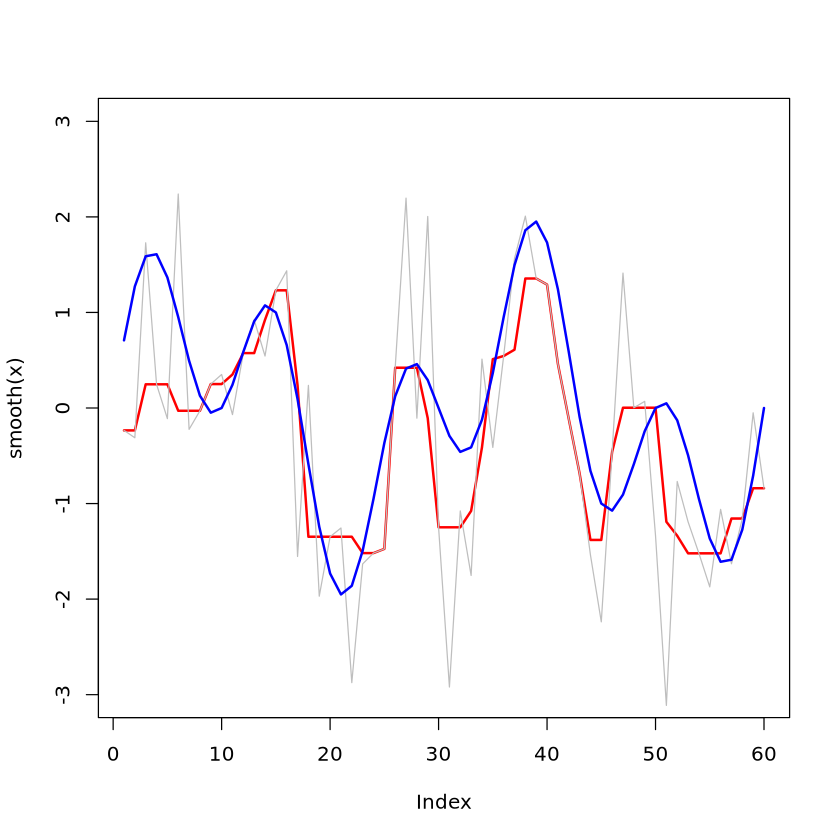

In [13]:
t = seq(1:60)
s = sin(2*pi*t/12) + sin(2*pi*t/30)
a = rnorm(60, 0, 1)
x = s+a

plot(smooth(x), type = 'l', lwd = 2, ylim = c(-3, 3), col = "red")  ## 3RS3R
lines(x, col = "grey")
lines(s, col = "blue", lwd = 2)

`-` 평활 방법

* 이동**평균**법(running **average**) : 2k개의 자료를 가지고 t시점의 값을 평활

$$smooth_t = \frac{(x_{t-k} + \cdots + x_t + \cdots + x_{t+k})}{2k+1}, ~ k+1 ≤ t ≤ n-k$$

> t시점의 앞뒤로 k개의 자료를 평균을 내어 평활한다. 이상치에 취약하다.

* 이동**중위수**(running **median**) : 2k개의 자료를 가지고 t시점의 값을 평활하되, 중위수로 t시점의 값을 택한다.

$$smooth_t = median(x_{t-k}, \cdots, x_t, \cdots, x_{t+k})$$

> 단순 평활기와 복합 평활기의 차이
>
> 단순 평활기 :  $smooth_{(t-\frac12)} = median(x_{t-2}, x_{t-1}, x_t, x_{t+1}), ~ smooth_{(t+\frac12)} = median(x_{t-1}, x_{t}, x_{t+1}, x_{t+2})$
>
> 복합 평활기 : $Smooth_t = \frac{smooth_{(t - \frac12)} + smooth_{(t+\frac12)}}{2}$
>
> * 위와 같은 평활을 42 평활이라고 한다.

`-` 여러 종류의 평활

* 3의 평활(단순 평활기) : $Smooth_t = median(x_{t-1}, x_t, x_{t+1})$

* 3R 평활 : 3의 평활을 더 이상 반복해도 동일한 결과가 나올 때까지 반복한다.

* 5의 평활 : $Smooth_t = median(x_{t_2}, x_{t-1}, x_t, x_{t+1}, x_{t+2})$

* 42 평활(복합 평활기) : 위에서 했던 평활. $Smooth_t = \frac{smooth_{(t - \frac12)} + smooth_{(t+\frac12)}}{2}$. 4의 평활을 앞뒤로 한 것의 중위수(평균)

`-` 해닝(Hanning)

$$\begin{align} Smooth_t = \frac{x_{t-1} + 2x_t + x_{t+1}}{4} \\ = \frac12(\frac{x_{t-1} + x_t}{2} + \frac{x_t + x_{t+1}}{2}) \end{align}$$

> 각 평균으로 평활한 것의 평균. 22 평활이라고 생각할 수 있다.
>
> 3의 평활을 한 후 이용하면 부드러워진다. $\to$ 3H 평활

`-` 분리(splitting)

평평한 봉우리나 골짜기가 있는 경우 두 값을 흐트러뜨리는 기법

$$X_t = X_u, u = t+1$$

> 서로 인접해있는 두 값

$$smooth_t = median(X_{t-1}, X_t, X_{t+1}^*), X_{t+1}^* = 3X_{t-1} - 2X_{t-2}$$

$$smooth_u = median(X_{u-1}^*, X_u, X_{u+1}), X_{u-1}^* = 3X_{u+1} - 2X_{u+2}$$

부드럽게 시계열 데이터를 평활할 수 있는 방법

`-` 4253H, twiceit

1) 42평활 시행
2) 5 이동 중위수로 재평활
3) 3 이동 중위수로 재평활
4) 해닝(22평활)으로 이상치 제거
5) twiceit, 4253H 평활한 수계열을 기존 수계열에 빼서 남은 거칠음에 대하여 4253H 방법을 한 번 더 사용하여 평활한다. 그리고 둘을 더한다.

$$4253H, twiceit = X'_t + X''_t = smooth_t$$

`-` 3RSSH, twiceit

1) 3R 평활 시생
2) 분리(splitting)
3) 한번 더 분리(splitting)
4) 해닝(22평활)으로 이상치 제거
5) twiceit

`-` 끝값의 평활

1) 베껴쓰기 : $smooth_1 = x_1, smooth_n = x_n$
2) 분리(Splitting)의 원리 이용

$$x^*_0 = 3x_2 - 2x_3 \to Smooth_1 = median(x^*_0, x_1, x_2)$$

$$x^*_{n+1} = 3x_{n-1} - 2x_{n-2} \to Smooth_n = median(x_{n-1}, x_n, x^*_{n+1})$$

In [ ]:
smooth(x, kind = "3RS3R", twiceit = TRUE,  ## 3RS3R, 3RSS, 3RSR, 3R, 3, S
      endrule = "Tukey", do.ends = FALSE)  ## Tukey, copy